Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [3]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [15]:
classifier = svm.SVC(kernel='linear')

In [16]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [17]:
Y_train_pred = classifier.predict(X_train)
training_accuracy = accuracy_score(Y_train, Y_train_pred)
training_precision = precision_score(Y_train, Y_train_pred)
training_recall = recall_score(Y_train, Y_train_pred)
training_f1 = f1_score(Y_train, Y_train_pred)
training_roc_auc = roc_auc_score(Y_train, Y_train_pred)
training_confusion = confusion_matrix(Y_train, Y_train_pred)
print('Training Accuracy: ', training_accuracy)
print('Training Precision: ', training_precision)
print('Training Recall: ', training_recall)
print('Training F1 Score: ', training_f1)
print('Training ROC AUC Score: ', training_roc_auc)
print('Training Confusion Matrix: \n', training_confusion)

# Test data metrics
Y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred)
test_roc_auc = roc_auc_score(Y_test, Y_test_pred)
test_confusion = confusion_matrix(Y_test, Y_test_pred)

print('Test Accuracy: ', test_accuracy)
print('Test Precision: ', test_precision)
print('Test Recall: ', test_recall)
print('Test F1 Score: ', test_f1)
print('Test ROC AUC Score: ', test_roc_auc)
print('Test Confusion Matrix: \n', test_confusion)

Training Accuracy:  0.7833876221498371
Training Precision:  0.7368421052631579
Training Recall:  0.5887850467289719
Training F1 Score:  0.6545454545454545
Training ROC AUC Score:  0.7381425233644859
Training Confusion Matrix: 
 [[355  45]
 [ 88 126]]
Test Accuracy:  0.7727272727272727
Test Precision:  0.7567567567567568
Test Recall:  0.5185185185185185
Test F1 Score:  0.6153846153846154
Test ROC AUC Score:  0.7142592592592593
Test Confusion Matrix: 
 [[91  9]
 [26 28]]


Model Evaluation

Accuracy Score

In [18]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [19]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [20]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [21]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [22]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, Y_train)

# Training data
Y_train_pred_logistic = logistic_classifier.predict(X_train)
training_accuracy_logistic = accuracy_score(Y_train_pred_logistic, Y_train)
training_precision_logistic = precision_score(Y_train, Y_train_pred_logistic)
training_recall_logistic = recall_score(Y_train, Y_train_pred_logistic)
training_f1_logistic = f1_score(Y_train, Y_train_pred_logistic)
training_roc_auc_logistic = roc_auc_score(Y_train, Y_train_pred_logistic)
training_confusion_matrix_logistic = confusion_matrix(Y_train, Y_train_pred_logistic)

print('Training Accuracy (Logistic Regression): ', training_accuracy_logistic)
print('Training Precision (Logistic Regression): ', training_precision_logistic)
print('Training Recall (Logistic Regression): ', training_recall_logistic)
print('Training F1 Score (Logistic Regression): ', training_f1_logistic)
print('Training ROC AUC Score (Logistic Regression): ', training_roc_auc_logistic)
print('Training Confusion Matrix (Logistic Regression): \n', training_confusion_matrix_logistic)
Y_test_pred_logistic = logistic_classifier.predict(X_test)
test_accuracy_logistic = accuracy_score(Y_test_pred_logistic, Y_test)
test_precision_logistic = precision_score(Y_test, Y_test_pred_logistic)
test_recall_logistic = recall_score(Y_test, Y_test_pred_logistic)
test_f1_logistic = f1_score(Y_test, Y_test_pred_logistic)
test_roc_auc_logistic = roc_auc_score(Y_test, Y_test_pred_logistic)
test_confusion_matrix_logistic = confusion_matrix(Y_test, Y_test_pred_logistic)

print('Test Accuracy (Logistic Regression): ', test_accuracy_logistic)
print('Test Precision (Logistic Regression): ', test_precision_logistic)
print('Test Recall (Logistic Regression): ', test_recall_logistic)
print('Test F1 Score (Logistic Regression): ', test_f1_logistic)
print('Test ROC AUC Score (Logistic Regression): ', test_roc_auc_logistic)
print('Test Confusion Matrix (Logistic Regression): \n', test_confusion_matrix_logistic)

Training Accuracy (Logistic Regression):  0.7850162866449512
Training Precision (Logistic Regression):  0.7440476190476191
Training Recall (Logistic Regression):  0.5841121495327103
Training F1 Score (Logistic Regression):  0.6544502617801047
Training ROC AUC Score (Logistic Regression):  0.7383060747663551
Training Confusion Matrix (Logistic Regression): 
 [[357  43]
 [ 89 125]]
Test Accuracy (Logistic Regression):  0.7532467532467533
Test Precision (Logistic Regression):  0.7
Test Recall (Logistic Regression):  0.5185185185185185
Test F1 Score (Logistic Regression):  0.5957446808510638
Test ROC AUC Score (Logistic Regression):  0.6992592592592592
Test Confusion Matrix (Logistic Regression): 
 [[88 12]
 [26 28]]


c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, Y_train)

# Training data
Y_train_pred_rf = random_forest_classifier.predict(X_train)
training_accuracy_rf = accuracy_score(Y_train_pred_rf, Y_train)
training_precision_rf = precision_score(Y_train, Y_train_pred_rf)
training_recall_rf = recall_score(Y_train, Y_train_pred_rf)
training_f1_rf = f1_score(Y_train, Y_train_pred_rf)
training_roc_auc_rf = roc_auc_score(Y_train, Y_train_pred_rf)
training_confusion_matrix_rf = confusion_matrix(Y_train, Y_train_pred_rf)

print('Training Accuracy (Random Forest): ', training_accuracy_rf)
print('Training Precision (Random Forest): ', training_precision_rf)
print('Training Recall (Random Forest): ', training_recall_rf)
print('Training F1 Score (Random Forest): ', training_f1_rf)
print('Training ROC AUC Score (Random Forest): ', training_roc_auc_rf)
print('Training Confusion Matrix (Random Forest): \n', training_confusion_matrix_rf)

# Test data
Y_test_pred_rf = random_forest_classifier.predict(X_test)
test_accuracy_rf = accuracy_score(Y_test_pred_rf, Y_test)
test_precision_rf = precision_score(Y_test, Y_test_pred_rf)
test_recall_rf = recall_score(Y_test, Y_test_pred_rf)
test_f1_rf = f1_score(Y_test, Y_test_pred_rf)
test_roc_auc_rf = roc_auc_score(Y_test, Y_test_pred_rf)
test_confusion_matrix_rf = confusion_matrix(Y_test, Y_test_pred_rf)

print('Test Accuracy (Random Forest): ', test_accuracy_rf)
print('Test Precision (Random Forest): ', test_precision_rf)
print('Test Recall (Random Forest): ', test_recall_rf)
print('Test F1 Score (Random Forest): ', test_f1_rf)
print('Test ROC AUC Score (Random Forest): ', test_roc_auc_rf)
print('Test Confusion Matrix (Random Forest): \n', test_confusion_matrix_rf)

Training Accuracy (Random Forest):  1.0
Training Precision (Random Forest):  1.0
Training Recall (Random Forest):  1.0
Training F1 Score (Random Forest):  1.0
Training ROC AUC Score (Random Forest):  1.0
Training Confusion Matrix (Random Forest): 
 [[400   0]
 [  0 214]]
Test Accuracy (Random Forest):  0.7467532467532467
Test Precision (Random Forest):  0.6744186046511628
Test Recall (Random Forest):  0.5370370370370371
Test F1 Score (Random Forest):  0.5979381443298969
Test ROC AUC Score (Random Forest):  0.6985185185185186
Test Confusion Matrix (Random Forest): 
 [[86 14]
 [25 29]]


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming X_train and Y_train are your training data (numerical features)

# Define the model
model_1 = models.Sequential([
  layers.Input(shape=(X_train.shape[1],)),  # Input layer with number of features
  layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
  layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (adapt for your task)
])

# Compile the model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_1.fit(X_train, Y_train, epochs=500)


Epoch 1/500


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2040 - loss: 11.4361       
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.4884 - loss: 1.7809
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.5746 - loss: 1.3361
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5437 - loss: 1.2927
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5752 - loss: 1.1520
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.5819 - loss: 1.0638
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.5764 - loss: 0.9419
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.6051 - loss: 0.9021
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.6014 - loss: 0.8151
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.6106 - loss: 0.8699
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.6324 - loss: 0.7417
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 692u

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score

# Define the CNN architecture
model_cnn = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Reshape((8, 1, 1)),
    layers.Conv2D(32, (3, 1), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model_cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model_cnn.fit(X_train, Y_train, epochs=1000, batch_size=16)



# Evaluate the model on training data
Y_train_prediction = model_cnn.predict(X_train)
training_data_accuracy = accuracy_score(tf.argmax(Y_train_prediction, axis=1), Y_train)
print("Training data accuracy:", training_data_accuracy)
# test_data_accuracy = accuracy_score(tf.argmax(Y_train_prediction, axis=1), Y_test)
training_data_precision = precision_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_recall = recall_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_f1 = f1_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_confusion = confusion_matrix(Y_train, tf.argmax(Y_train_prediction, axis=1))

print("Test Data Accuracy:", training_data_accuracy)
print("Test Data Precision:", training_data_precision)
print("Test Data Recall:", training_data_recall)
print("Test Data F1 Score:", training_data_f1)
print("Test Data Confusion Matrix:\n", training_data_confusion )

Epoch 1/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2656 - loss: 28.1657       
Epoch 2/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.6509 - loss: 0.9225
Epoch 3/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.6313 - loss: 0.7986
Epoch 4/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.5845 - loss: 0.7637
Epoch 5/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.6661 - loss: 0.7596
Epoch 6/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - loss: 0.9807
Epoch 7/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.6749 - loss: 0.6750
Epoch 8/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.6183 - loss: 0.8102
Epoch 9/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6694 - loss: 0.7848
Epoch 10/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.6407 - loss: 0.8920
Epoch 11/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.6611 - loss: 0.7803
Epoch 12/1000
39/39 ━━━━━━

Making a Predictive System

C:\Users\Sahil\AppData\Local\Temp\ipykernel_13836\3894871846.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_13836\3894871846.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_13836\3894871846.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_13836\3894871846.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)


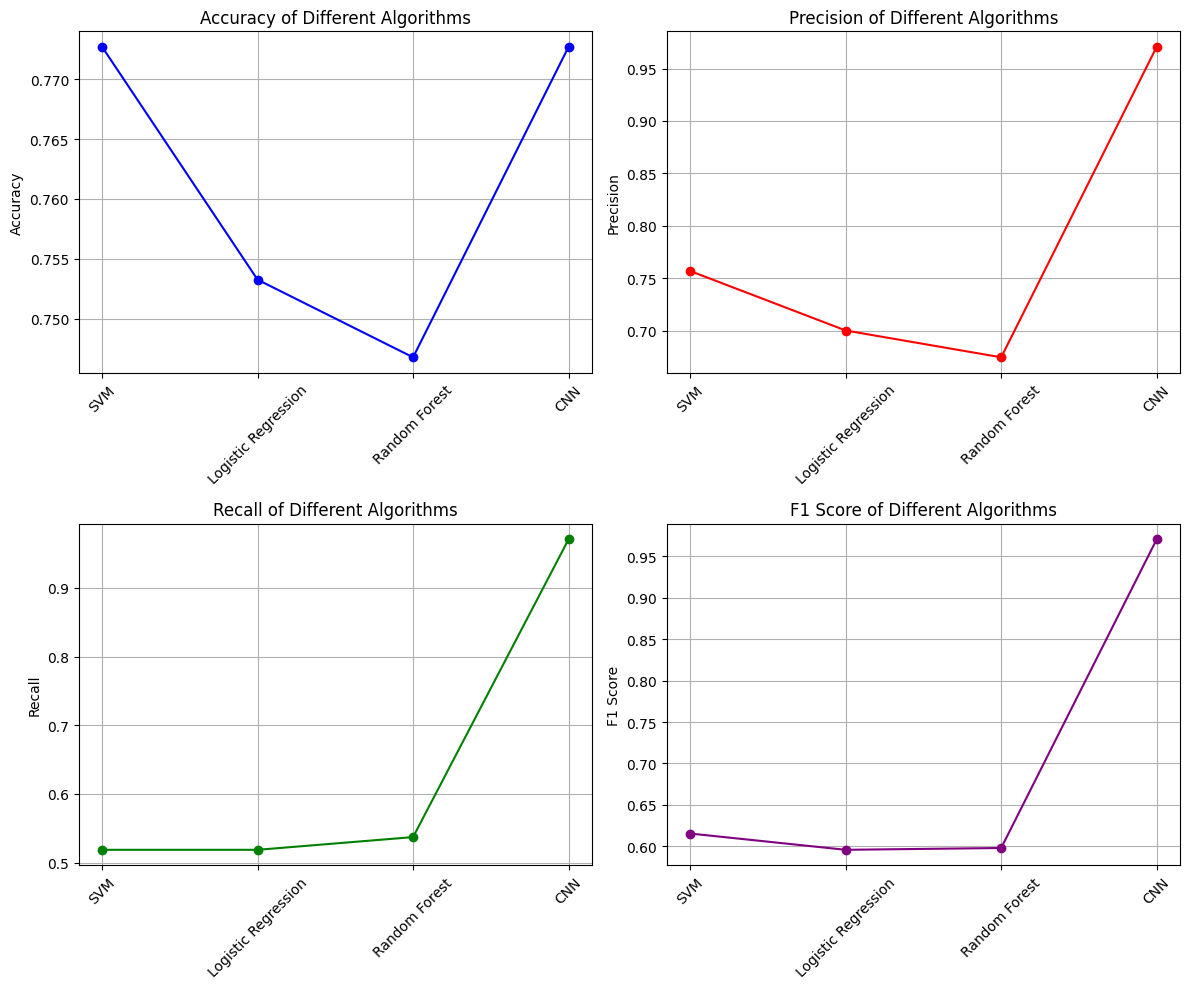

In [29]:
import matplotlib.pyplot as plt

# Performance metrics values for each algorithm
accuracy_values = [test_accuracy, test_accuracy_logistic, test_accuracy_rf, test_data_accuracy]
precision_values = [test_precision, test_precision_logistic, test_precision_rf, training_data_precision]
recall_values = [test_recall, test_recall_logistic, test_recall_rf, training_data_recall]
f1_values = [test_f1, test_f1_logistic, test_f1_rf, training_data_f1]

# Algorithm names
algorithms = ['SVM', 'Logistic Regression', 'Random Forest', 'CNN']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy plot
axs[0, 0].plot(algorithms, accuracy_values, marker='o', linestyle='-', color='b')
axs[0, 0].set_title('Accuracy of Different Algorithms')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

# Precision plot
axs[0, 1].plot(algorithms, precision_values, marker='o', linestyle='-', color='r')
axs[0, 1].set_title('Precision of Different Algorithms')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

# Recall plot
axs[1, 0].plot(algorithms, recall_values, marker='o', linestyle='-', color='g')
axs[1, 0].set_title('Recall of Different Algorithms')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

# F1 Score plot
axs[1, 1].plot(algorithms, f1_values, marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('F1 Score of Different Algorithms')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

# Rotate x-axis labels
for ax in axs.flat:
    ax.set_xticklabels(algorithms, rotation=45)

plt.tight_layout()
plt.show()


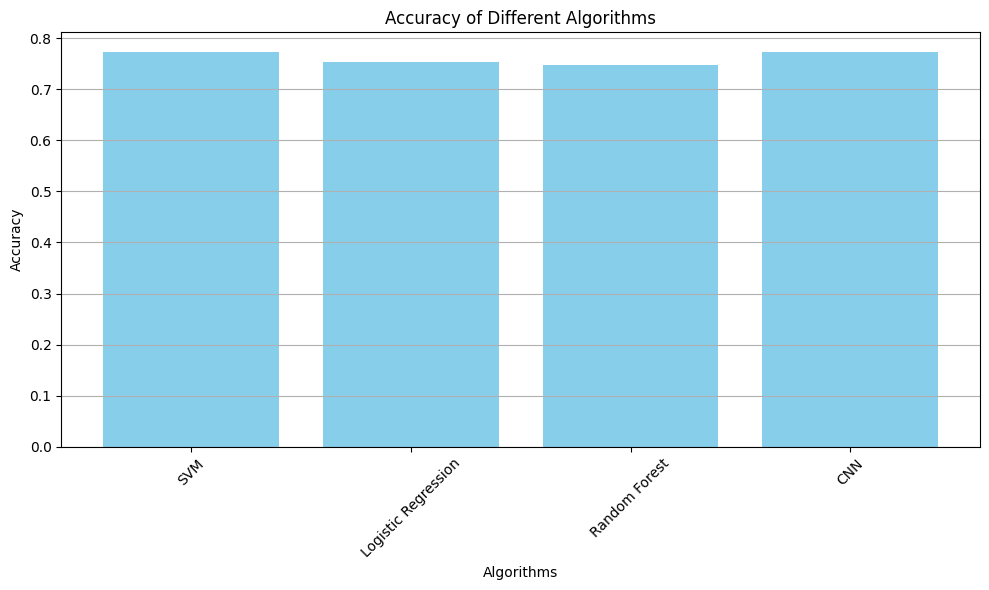

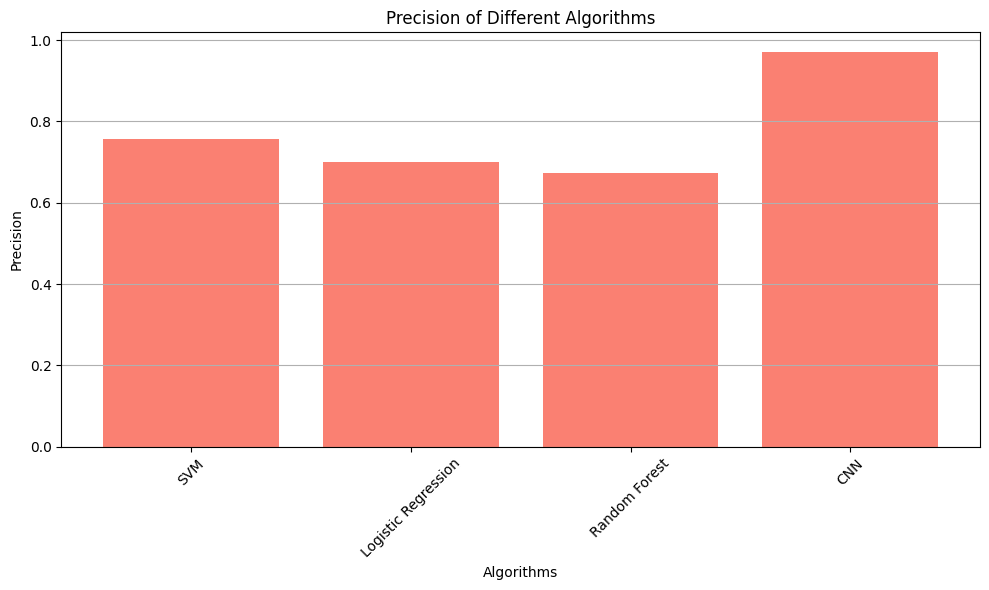

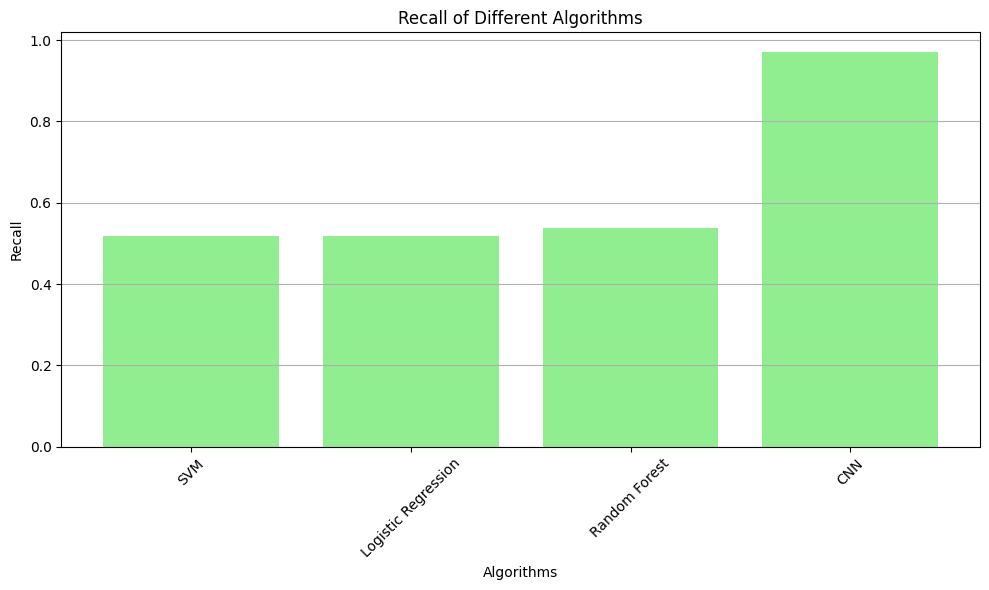

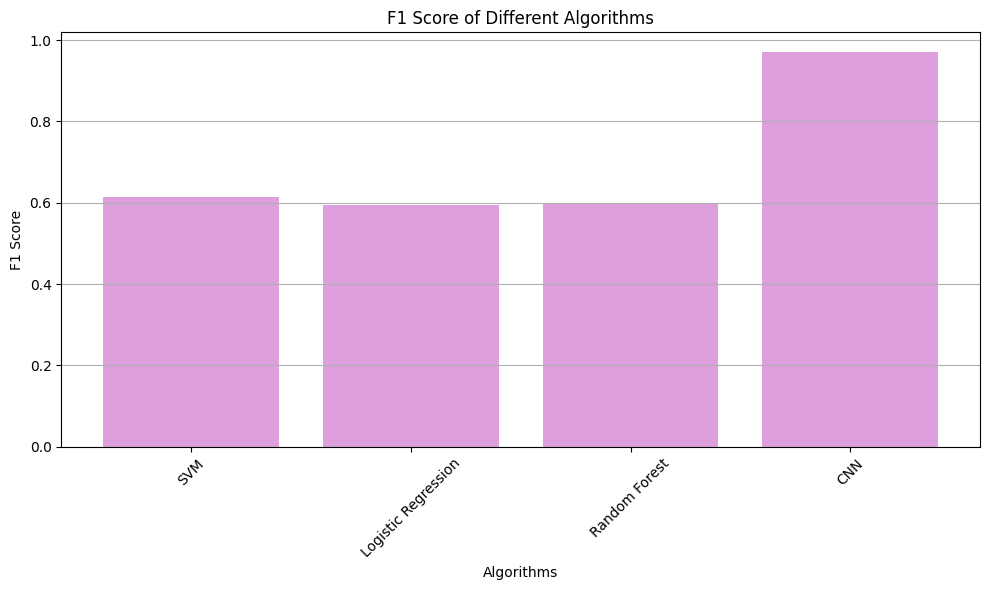

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_values, color='skyblue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for precision
plt.figure(figsize=(10, 6))
plt.bar(algorithms, precision_values, color='salmon')
plt.title('Precision of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for recall
plt.figure(figsize=(10, 6))
plt.bar(algorithms, recall_values, color='lightgreen')
plt.title('Recall of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for F1 Score
plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_values, color='plum')
plt.title('F1 Score of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

NameError: name 'x' is not defined

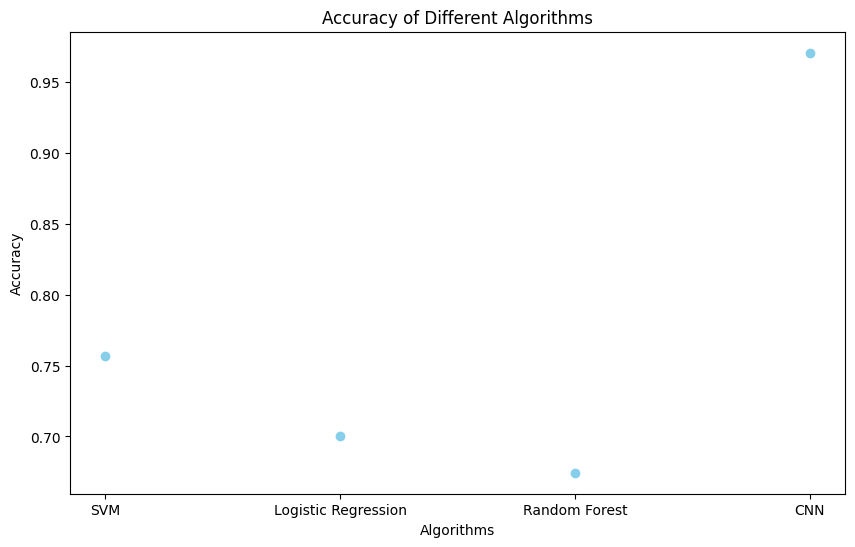

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns



# Scatter plot for accuracy
plt.figure(figsize=(10, 6))
plt.scatter(algorithms,precision_values , color='skyblue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(x, ['SVM', 'Logistic Regression', 'Random Forest', 'CNN'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Example data for heatmap
confusion_matrix_data = [[10, 2, 0],
                         [3, 15, 1],
                         [0, 1, 12]]

# Heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.tight_layout()
plt.show()


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
